In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Loading the dataset

In [4]:
df = pd.read_csv('./Datasets/titanic_data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [5]:
df.shape

(891, 12)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

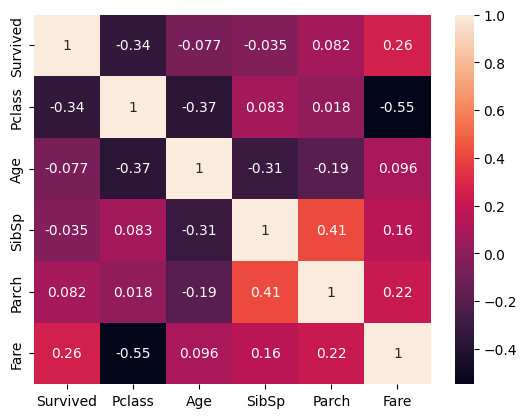

In [8]:
sns.heatmap(df[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr(), annot=True)

SibSp = Number of Siblings

<Axes: xlabel='SibSp', ylabel='count'>

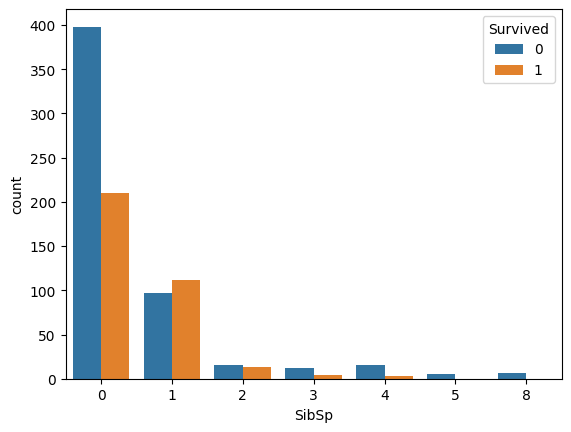

In [9]:
sns.countplot(x="SibSp", data = df, hue="Survived")

In [10]:
result = df.groupby("SibSp").agg({'Survived': ['count', lambda x: (x == 1).sum()]})
result.columns = ['Count', 'Survived']
result["Survive Ratio"] = result["Survived"] / result["Count"]

result.head()

,Count,Survived,Survive Ratio
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667


Text(0.5, 1.0, 'Survival Ratio Based on SibSp')

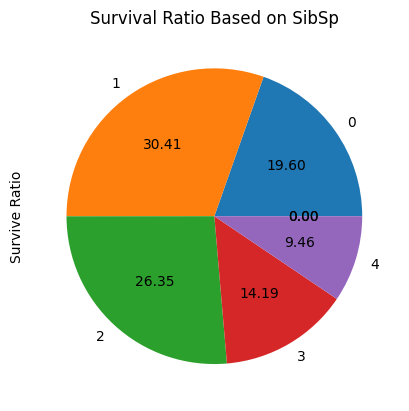

In [11]:
result["Survive Ratio"].plot(kind="pie", autopct="%.2f").set_title("Survival Ratio Based on SibSp")

*Conclusion : People with less siblings have more chances to survive*

Age Visualization

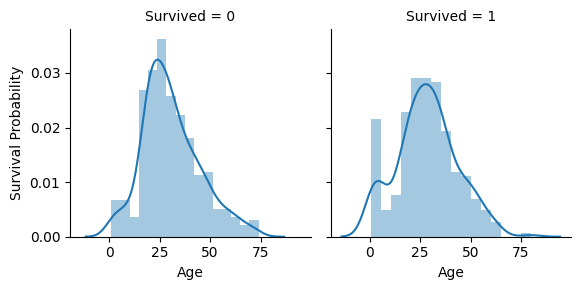

In [12]:
age_visual = sns.FacetGrid(df, col="Survived")
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

In [13]:
bins = [1,20,40,60,80]
labels = ["1-20","20-40","40-60","60-80"]

df["Age Range"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_df = df.groupby("Age Range").agg({'Survived': ['count', lambda x: (x == 1).sum()]})
age_df.columns = ["Count","Survived"]
age_df["Survival Ratio"] = age_df["Survived"]/age_df["Count"]

age_df.head()

,Count,Survived,Survival Ratio
Age Range,,,
1-20,157,72,0.458599
20-40,387,150,0.387597
40-60,137,54,0.394161
60-80,25,6,0.240000


Text(0.5, 1.0, 'Survival Ratio Based on Age Groups')

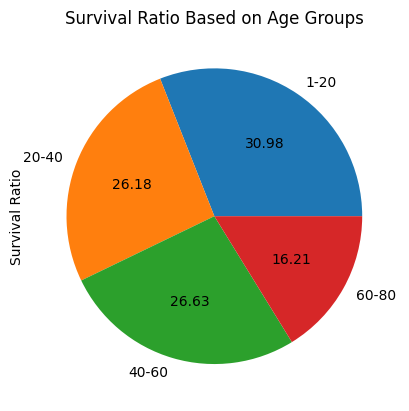

In [14]:
age_df["Survival Ratio"].plot(kind="pie", autopct="%.2f").set_title("Survival Ratio Based on Age Groups")

*Conclusion : People with less age has more chance to survive than older people*

Gender Visualization

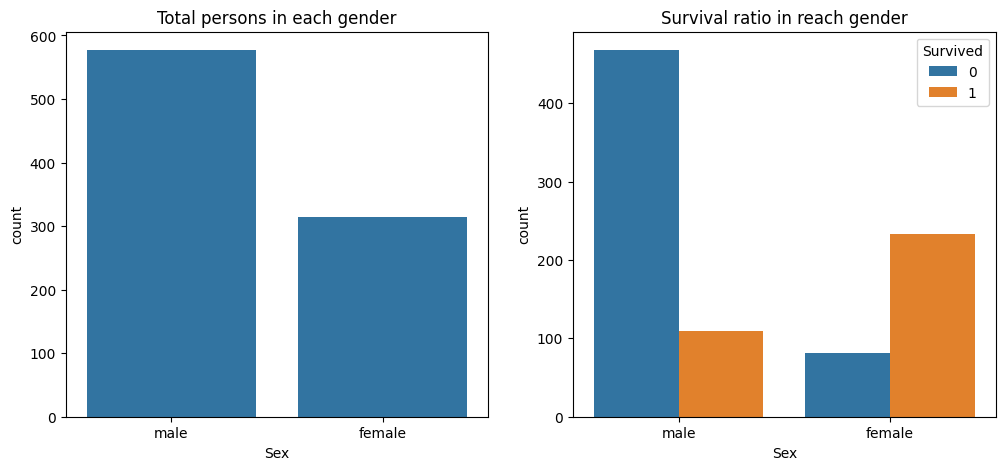

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x="Sex", data=df).set_title("Total persons in each gender")
plt.subplot(1,2,2)
sns.countplot(x="Sex", data=df, hue="Survived").set_title("Survival ratio in reach gender")

plt.show()

In [16]:
sex_df = df[["Sex","Survived"]].groupby("Sex").agg({"Sex":["count"],"Survived":[lambda x : (x==1).sum(),"mean"]})
sex_df.columns = ["Count","Survived","Percentage"]

sex_df

,Count,Survived,Percentage
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


*Conclusion : Female have much higher survival chance than male passengers*

PClass Visualization

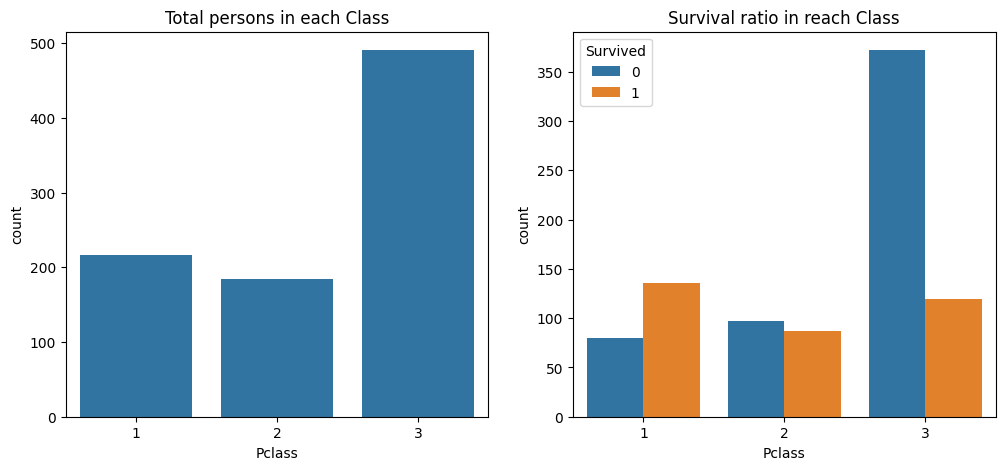

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=df).set_title("Total persons in each Class")
plt.subplot(1,2,2)
sns.countplot(x="Pclass", data=df, hue="Survived").set_title("Survival ratio in reach Class")

plt.show()

In [18]:
pclass_df = df[["Pclass","Survived"]].groupby("Pclass").agg({"Pclass":["count"],"Survived":[lambda x: (x==1).sum(), "mean"]})
pclass_df.columns = ["Count","Survived","Percentage"]

pclass_df.head()

,Count,Survived,Percentage
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


*Conclusion : Passenger with higher class has more chance of survival*

Embark Visualization (Means relationship b/w the survival of the passenger with their source of journey)

In [19]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
df["Embarked"].isna().sum()

2

In [21]:
# As most of the passengers are from 'S' so fill the null values with S

df["Embarked"].fillna("S", inplace=True)

df['Embarked'].isna().sum()

0

<Axes: xlabel='Embarked', ylabel='Survived'>

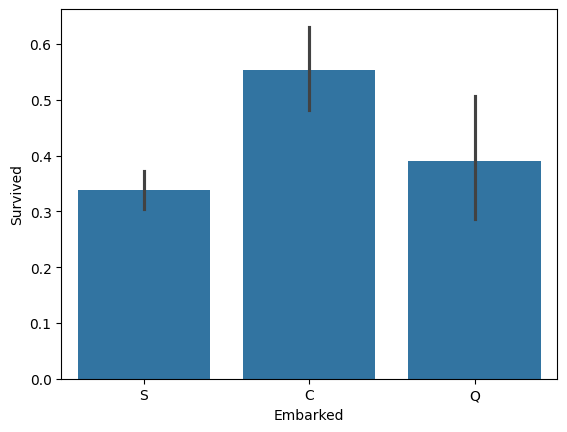

In [22]:
sns.barplot(x="Embarked",y="Survived", data=df)

Know why passengers from "C" has more chance of survival

In [23]:
emb_df = df[["Embarked","Survived","Sex","Pclass"]].groupby("Embarked").agg({
    "Embarked":["size"],
    "Survived":[lambda x: (x==1).sum()],
    "Sex": [lambda x: (x=="male").sum(),lambda x: (x=="female").sum()],
    "Pclass": [lambda x : (x==1).sum(),lambda x : (x==2).sum(),lambda x : (x==3).sum()]
})

emb_df.columns = ["Count","Survived","Male","Female", "1st_Class","2nd_Class","3rd_Class"]

emb_df.head()

,Count,Survived,Male,Female,1st_Class,2nd_Class,3rd_Class
Embarked,,,,,,,
C,168,93,95,73,85,17,66
Q,77,30,41,36,2,3,72
S,646,219,441,205,129,164,353


<Axes: xlabel='Embarked'>

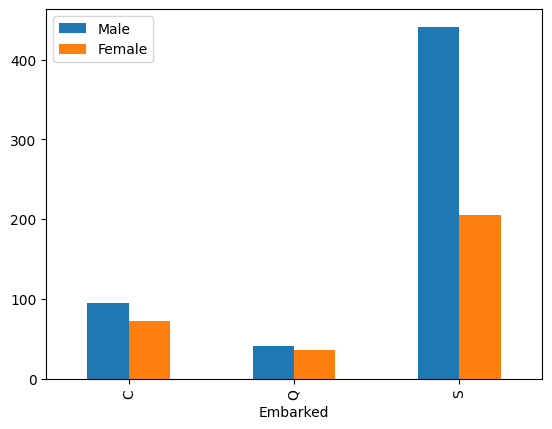

In [24]:
emb_df[["Male","Female"]].plot(kind="bar")

<Axes: xlabel='Embarked'>

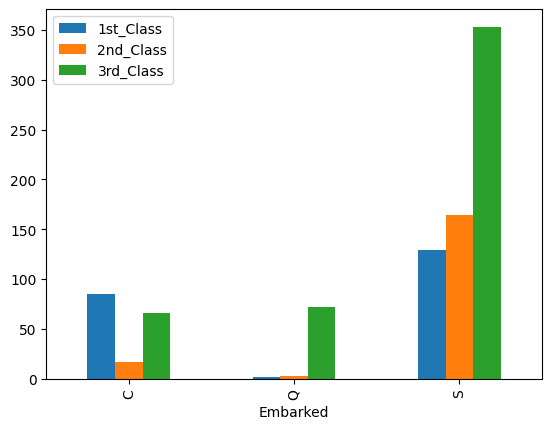

In [25]:
emb_df[["1st_Class","2nd_Class","3rd_Class"]].plot(kind="bar")

*Conclusion : Passengers coming from "C" are mostly first class passengers with nearly equal male female ratio whereas passengers from "S" are mostly 3rd class passenger with male number are extremely larger than female that's why Passengers coming from "C" hash much higher survival chance than "S"*

## Preprocessing

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age Range      185
dtype: int64

fill all the null values of age with the frequently used ages

In [27]:
mean_age = df["Age"].mean()
std_age = df["Age"].std()
null_age = df["Age"].isna()

print(mean_age, std_age, null_age.sum())

29.69911764705882 14.526497332334042 177


In [28]:
fill_age = np.random.randint(mean_age - std_age, mean_age + std_age, size=null_age.sum())

fill_age

array([22, 15, 41, 29, 31, 32, 40, 34, 15, 36, 40, 28, 18, 16, 39, 31, 38,
       32, 15, 35, 22, 25, 38, 36, 43, 26, 37, 36, 29, 19, 27, 16, 17, 28,
       34, 23, 37, 25, 23, 35, 41, 42, 43, 16, 36, 16, 43, 27, 15, 26, 27,
       31, 40, 27, 15, 41, 43, 24, 40, 15, 28, 33, 22, 41, 15, 39, 29, 20,
       19, 24, 28, 34, 15, 24, 21, 24, 32, 29, 38, 17, 42, 18, 31, 15, 19,
       40, 31, 41, 34, 29, 29, 24, 15, 26, 38, 15, 19, 18, 32, 43, 23, 41,
       24, 19, 16, 34, 27, 37, 34, 30, 35, 15, 28, 37, 31, 19, 20, 27, 43,
       30, 34, 33, 33, 41, 17, 22, 20, 37, 43, 38, 43, 33, 23, 25, 38, 40,
       38, 22, 26, 40, 17, 43, 19, 31, 31, 25, 33, 19, 33, 36, 16, 30, 24,
       22, 41, 42, 40, 15, 42, 32, 28, 30, 41, 15, 16, 20, 40, 24, 31, 24,
       39, 18, 24, 30, 39, 35, 30])

In [29]:
df.loc[null_age,"Age"] = fill_age

df[df["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Range


In [30]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age Range      185
dtype: int64

In [31]:
df.drop("Cabin", axis=1, inplace=True)
df.drop("Age Range", axis=1, inplace=True)

In [32]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting "Sex" column into numerical

In [33]:
gender = {
    "male":1,
    "female":0
}

df["Sex"] = df["Sex"].map(gender)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


Converting "Embarked" column into numerical

In [34]:
ports = {
    "S":0,
    "C":1,
    "Q":2
}

df["Embarked"] = df["Embarked"].map(ports)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


## Spliting the data

In [37]:
x = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values
y = df["Survived"].values

x

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  0.    , 30.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [38]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

x_test.shape, y_test.shape

((268, 7), (268,))

In [40]:
x_train.shape, y_train.shape

((623, 7), (623,))

## Standardization

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test

array([[ 0.80326712,  0.72077194, -0.30769828, ...,  0.75976322,
        -0.32547755,  1.01646537],
       [-0.41730706,  0.72077194,  0.13299575, ..., -0.47932706,
        -0.41855727, -0.55489425],
       [ 0.80326712,  0.72077194, -0.6749433 , ..., -0.47932706,
        -0.46906094, -0.55489425],
       ...,
       [-1.63788124,  0.72077194,  2.63026192, ..., -0.47932706,
        -0.10376746, -0.55489425],
       [ 0.80326712,  0.72077194, -0.89529032, ..., -0.47932706,
        -0.45459629, -0.55489425],
       [-1.63788124,  0.72077194, -0.08735126, ..., -0.47932706,
        -0.10376746, -0.55489425]])

## Implement Classification models

In [42]:
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier(n_estimators=500)
svc_model = SVC()

In [44]:
logistic_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)

SVC()

In [45]:
logistic_yPred = logistic_model.predict(x_test)
knn_yPred = knn_model.predict(x_test)
decision_tree_yPred = decision_tree_model.predict(x_test)
random_forest_yPred = random_forest_model.predict(x_test)
svc_yPred = svc_model.predict(x_test)

## Accuracy

In [56]:
from sklearn.metrics import accuracy_score

logistic_accuracy = accuracy_score(y_test, logistic_yPred)
knn_accuracy = accuracy_score(y_test, knn_yPred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_yPred)
random_forest_accuracy = accuracy_score(y_test, random_forest_yPred)
svc_accuracy = accuracy_score(y_test, svc_yPred)

print("Logistic Regression :",logistic_accuracy,
      "\nKnn                 :",knn_accuracy,
      "\nDecision Tree       :",decision_tree_accuracy,
      "\nRandom Forest       :",random_forest_accuracy,
      "\nSupport Vector      :",svc_accuracy)

Logistic Regression : 0.8134328358208955 
Knn                 : 0.7985074626865671 
Decision Tree       : 0.7611940298507462 
Random Forest       : 0.7947761194029851 
Support Vector      : 0.8171641791044776
